In [2]:
import pandas as pd

## Preprocess CompleteP2P-Part1 Parquet File

In [80]:
file_path = 'CompleteP2P-Part1.parquet'
df = pd.read_parquet(file_path)

print(df.shape)
df.head()

(369824, 17)


,Case_ID,variant,variant_index,creator,InvoiceNumber,PONumber,Activity,Resource,Activity_1,Vendor_Code,Site,TotalGST,TotalAmount,User,VendorCode,End_Time,Start_Time
0,HPDE001 - 247742,Variant 2,2,Fluxicon Disco,247742,583849.0,InvoiceProcessed,Staff,InvoiceProcessed,HPDE001,Site - EF,0.0,572.27,Staff,None,2022-09-05T16:00:00.000,2022-09-05T16:00:00.000
1,HPDE001 - 247742,Variant 2,2,Fluxicon Disco,247742,583849.0,Invoice Changed,Staff,Invoice Changed,HPDE001,Site - EF,0.0,572.27,Staff,None,2022-09-27T08:51:00.000,2022-09-27T08:51:00.000
2,HPDE001 - 247742,Variant 2,2,Fluxicon Disco,247742,583849.0,InvoiceDueDate,Not Activity,InvoiceDueDate,HPDE001,Site - EF,0.0,572.27,Not Activity,None,2022-09-29T16:00:00.000,2022-09-29T16:00:00.000
3,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,PO Order Created,Staff,PO Order Created,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-08-23T16:00:00.000,2022-08-23T16:00:00.000
4,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,InvoiceDate,Not Activity,InvoiceDate,HPDE001,Site - PQ,0.0,49.50,Not Activity,None,2022-08-25T16:00:00.000,2022-08-25T16:00:00.000


### 1. Add 'Stage' Attribute Column

In [81]:
def categorize_activity_pre(activity):
    if activity in ['PO Order Created', 'InvoiceDate']:
        return 'Order'
    elif activity in ['Goods Arrived', 'Goods Receipted', 'PO Changed']:
        return 'Delivery'
    elif activity in ['InvoiceProcessed', 'Invoice Changed', 'InvoiceDueDate']:
        return 'Payment'
    else:
        return 'Other'

df['Stage'] = df['Activity'].apply(categorize_activity_pre)

In [64]:
df.head(10)

,Case_ID,variant,variant_index,creator,InvoiceNumber,PONumber,Activity,Resource,Activity_1,Vendor_Code,Site,TotalGST,TotalAmount,User,VendorCode,End_Time,Start_Time,Stage
0,HPDE001 - 247742,Variant 2,2,Fluxicon Disco,247742,583849.0,InvoiceProcessed,Staff,InvoiceProcessed,HPDE001,Site - EF,0.0,572.27,Staff,None,2022-09-05T16:00:00.000,2022-09-05T16:00:00.000,Payment
1,HPDE001 - 247742,Variant 2,2,Fluxicon Disco,247742,583849.0,Invoice Changed,Staff,Invoice Changed,HPDE001,Site - EF,0.0,572.27,Staff,None,2022-09-27T08:51:00.000,2022-09-27T08:51:00.000,Payment
2,HPDE001 - 247742,Variant 2,2,Fluxicon Disco,247742,583849.0,InvoiceDueDate,Not Activity,InvoiceDueDate,HPDE001,Site - EF,0.0,572.27,Not Activity,None,2022-09-29T16:00:00.000,2022-09-29T16:00:00.000,Payment
3,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,PO Order Created,Staff,PO Order Created,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-08-23T16:00:00.000,2022-08-23T16:00:00.000,Order
4,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,InvoiceDate,Not Activity,InvoiceDate,HPDE001,Site - PQ,0.0,49.50,Not Activity,None,2022-08-25T16:00:00.000,2022-08-25T16:00:00.000,Order
5,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,Goods Arrived,Staff,Goods Arrived,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-08-30T16:00:00.000,2022-08-30T16:00:00.000,Delivery
6,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,Goods Receipted,Staff,Goods Receipted,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-08-30T16:00:00.000,2022-08-30T16:00:00.000,Delivery
7,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,PO Changed,Staff,PO Changed,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-08-31T09:22:00.000,2022-08-31T09:22:00.000,Delivery
8,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,InvoiceProcessed,Staff,InvoiceProcessed,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-09-05T16:00:00.000,2022-09-05T16:00:00.000,Payment
9,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,Invoice Changed,Staff,Invoice Changed,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-09-27T08:51:00.000,2022-09-27T08:51:00.000,Payment


### 2. Add 'Site_Count' Attribute Column

In [82]:
site_counts = df.groupby('Case_ID')['Site'].nunique().reset_index(name='Site_Count')
df = pd.merge(df, site_counts, on='Case_ID', how='left')
df.head(10)

,Case_ID,variant,variant_index,creator,InvoiceNumber,PONumber,Activity,Resource,Activity_1,Vendor_Code,Site,TotalGST,TotalAmount,User,VendorCode,End_Time,Start_Time,Stage,Site_Count
0,HPDE001 - 247742,Variant 2,2,Fluxicon Disco,247742,583849.0,InvoiceProcessed,Staff,InvoiceProcessed,HPDE001,Site - EF,0.0,572.27,Staff,None,2022-09-05T16:00:00.000,2022-09-05T16:00:00.000,Payment,1
1,HPDE001 - 247742,Variant 2,2,Fluxicon Disco,247742,583849.0,Invoice Changed,Staff,Invoice Changed,HPDE001,Site - EF,0.0,572.27,Staff,None,2022-09-27T08:51:00.000,2022-09-27T08:51:00.000,Payment,1
2,HPDE001 - 247742,Variant 2,2,Fluxicon Disco,247742,583849.0,InvoiceDueDate,Not Activity,InvoiceDueDate,HPDE001,Site - EF,0.0,572.27,Not Activity,None,2022-09-29T16:00:00.000,2022-09-29T16:00:00.000,Payment,1
3,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,PO Order Created,Staff,PO Order Created,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-08-23T16:00:00.000,2022-08-23T16:00:00.000,Order,1
4,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,InvoiceDate,Not Activity,InvoiceDate,HPDE001,Site - PQ,0.0,49.50,Not Activity,None,2022-08-25T16:00:00.000,2022-08-25T16:00:00.000,Order,1
5,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,Goods Arrived,Staff,Goods Arrived,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-08-30T16:00:00.000,2022-08-30T16:00:00.000,Delivery,1
6,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,Goods Receipted,Staff,Goods Receipted,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-08-30T16:00:00.000,2022-08-30T16:00:00.000,Delivery,1
7,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,PO Changed,Staff,PO Changed,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-08-31T09:22:00.000,2022-08-31T09:22:00.000,Delivery,1
8,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,InvoiceProcessed,Staff,InvoiceProcessed,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-09-05T16:00:00.000,2022-09-05T16:00:00.000,Payment,1
9,HPDE001 - 247743,Variant 1,1,Fluxicon Disco,247743,584408.0,Invoice Changed,Staff,Invoice Changed,HPDE001,Site - PQ,0.0,49.50,Staff,None,2022-09-27T08:51:00.000,2022-09-27T08:51:00.000,Payment,1


In [66]:
df.sort_values(by='Site_Count', ascending=False)

,Case_ID,variant,variant_index,creator,InvoiceNumber,PONumber,Activity,Resource,Activity_1,Vendor_Code,Site,TotalGST,TotalAmount,User,VendorCode,End_Time,Start_Time,Stage,Site_Count
144101,ATLA003 - A22074805,Variant 1667,1667,Fluxicon Disco,A22074805,577179.0,Goods Arrived,Staff,Goods Arrived,ATLA003,Site - KL,6.26,68.84,Staff,None,2022-07-16T16:00:00.000,2022-07-16T16:00:00.000,Delivery,2
345091,ATLA003 - A22098660,Variant 1785,1785,Fluxicon Disco,A22098660,591789.0,Goods Arrived,Staff,Goods Arrived,ATLA003,Site - LM,12.38,136.22,Staff,None,2022-10-10T15:00:00.000,2022-10-10T15:00:00.000,Delivery,2
345081,ATLA003 - A22098659,Variant 1784,1784,Fluxicon Disco,A22098659,591713.0,Goods Receipted,Staff,Goods Receipted,ATLA003,Site - FG,4.13,45.41,Staff,None,2022-11-23T14:00:00.000,2022-11-23T14:00:00.000,Delivery,2
345082,ATLA003 - A22098659,Variant 1784,1784,Fluxicon Disco,A22098659,591713.0,InvoiceDueDate,Not Activity,InvoiceDueDate,ATLA003,Site - AB,4.13,45.41,Not Activity,None,2022-12-14T14:00:00.000,2022-12-14T14:00:00.000,Payment,2
345083,ATLA003 - A22098659,Variant 1784,1784,Fluxicon Disco,A22098659,591713.0,InvoiceProcessed,Staff,InvoiceProcessed,ATLA003,Site - AB,4.13,45.41,Staff,None,2022-12-18T14:00:00.000,2022-12-18T14:00:00.000,Payment,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124656,MALL001 - 525328.01,Variant 6,6,Fluxicon Disco,525328.01,594148.0,InvoiceProcessed,Staff,InvoiceProcessed,MALL001,Site - MN,0.00,869.82,Staff,None,2022-10-30T14:00:00.000,2022-10-30T14:00:00.000,Payment,1
124655,MALL001 - 525328.01,Variant 6,6,Fluxicon Disco,525328.01,594148.0,PO Changed,Staff,PO Changed,MALL001,Site - MN,0.00,869.82,Staff,None,2022-10-28T03:03:00.000,2022-10-28T03:03:00.000,Delivery,1
124654,MALL001 - 525328.01,Variant 6,6,Fluxicon Disco,525328.01,594148.0,InvoiceDate,Not Activity,InvoiceDate,MALL001,Site - MN,0.00,869.82,Not Activity,None,2022-10-27T15:00:00.000,2022-10-27T15:00:00.000,Order,1
124653,MALL001 - 525328.01,Variant 6,6,Fluxicon Disco,525328.01,594148.0,Goods Receipted,Staff,Goods Receipted,MALL001,Site - MN,0.00,869.82,Staff,None,2022-10-27T15:00:00.000,2022-10-27T15:00:00.000,Delivery,1


### EDA

Each case ID is associated with just one PO number.

In [47]:
caseid_ponum_counts = df.groupby('Case_ID')['PONumber'].nunique()
multiple_ponum_caseids = caseid_ponum_counts[caseid_ponum_counts > 1].reset_index()
multiple_ponum_caseids.columns = ['Case_ID', 'Unique PO Number Count']
print(caseid_ponum_counts)
print(multiple_ponum_caseids)

Case_ID
4HEA001 - 24122431    1
ACCO001 - 205077      1
ACCO001 - 205195      1
ACCO001 - 205632      1
ACCO001 - 205633      1
                     ..
WISD001 - 20014913    1
WISD001 - 20014951    1
WISD001 - 20014988    1
WISD001 - 20014991    1
WISD001 - IV000124    1
Name: PONumber, Length: 43332, dtype: int64
Empty DataFrame
Columns: [Case_ID, Unique PO Number Count]
Index: []


Goods arrive-Goods Receipts happening multiple times in only one site.

In [57]:
# Step 1: Filter for the relevant activities: "Goods Arrive" and "Goods Receipts"
relevant_activities = df[df['Activity'].isin(['Goods Arrived', 'Goods Receipted'])]

# Step 2: Group by 'Case_ID', 'Site', and 'Activity' to count occurrences per case at each site
activity_counts = relevant_activities.groupby(['Case_ID', 'Site', 'Activity']).size().reset_index(name='Count')

# Step 3: Filter for cases where the activity occurs more than once for the same case and site
multiple_occurrences = activity_counts[activity_counts['Count'] > 1]

multiple_occurrences

,Case_ID,Site,Activity,Count
4,ACCO001 - 205195,Site - BC,Goods Arrived,2
10,ACCO001 - 205738,Site - LM,Goods Arrived,2
11,ACCO001 - 205738,Site - LM,Goods Receipted,2
18,ACCO001 - 206023,Site - WX,Goods Arrived,4
19,ACCO001 - 206023,Site - WX,Goods Receipted,3
...,...,...,...,...
88183,VERI005 - 29527201,Site - UV,Goods Arrived,2
88191,VERI005 - 29549101,Site - GH,Goods Arrived,2
88193,VERI005 - 29554501,Site - JK,Goods Arrived,3
88359,WISD001 - 20014838,Site - EF,Goods Arrived,2


There are 1,101 cases, each performed at two different sites.

In [14]:
caseid_site_counts = df.groupby('Case_ID')['Site'].nunique()
multiple_site_caseids = caseid_site_counts[caseid_site_counts > 1].reset_index()
multiple_site_caseids.columns = ['Case_ID', 'Unique Site Count']
multiple_site_caseids.sort_values(by='Unique Site Count', ascending=False)

,Case_ID,Unique Site Count
0,ACCO001 - 206555,2
732,MCWH001 - 364419-1,2
738,MYCE001 - INV-5627,2
737,MILL008 - 415066,2
736,MILL007 - 417196,2
...,...,...
373,ATLA003 - A22092574,2
374,ATLA003 - A22092608,2
375,ATLA003 - A22092616,2
376,ATLA003 - A22094043,2


In [28]:
#filtered_df = df[df['Case_ID'].isin(multiple_site_caseids['Case_ID'])]

# Group by Site and Activity and count occurrences
#site_activity_counts = filtered_df.groupby(['Site', 'Activity']).size().reset_index(name='Count')

activities_to_remove = ['Bot - BusinessExceptionActioned', 'Bot - InvoiceAlreadyProcessed', 'Bot - InvoiceDate', 'Bot - InvoiceDigitised', 'Bot - InvoiceDueDate', 'Bot - InvoiceEntry-Error', 'Bot - InvoiceParked', 'Bot - InvoiceProcessed', 'Bot - ParkingError', 'Bot - SentToHomes', 'Bot - InvoiceReceived', 'Bot - ReturnToAP', 'Bot - SentToAP', 'Bot - SentToActionCentre', 'Invoice Changed-Posted']
filtered_df  = df[~df['Activity'].isin(activities_to_remove)]

site_activity_crosstab = pd.crosstab(filtered_df['Site'],filtered_df['Activity'])
site_activity_crosstab

Activity,Goods Arrived,Goods Receipted,Invoice Changed,InvoiceDate,InvoiceDueDate,InvoiceProcessed,PO Changed,PO Order Created
Site,,,,,,,,
Site - @A,863,854,814,805,805,805,814,814
Site - AB,2255,2050,1983,1985,1985,1985,1984,1985
Site - BC,3923,3886,3163,3107,3107,3107,3173,3173
Site - CD,861,865,799,761,761,761,799,799
Site - DE,854,828,768,758,758,758,769,769
Site - EF,2766,2812,2108,2052,2052,2052,2111,2111
Site - FG,1962,1931,1655,1631,1631,1631,1659,1659
Site - GH,2928,2840,2326,2278,2278,2278,2338,2338
Site - HI,2658,2629,2152,2090,2090,2090,2152,2152


According to chi square test, where p-value is calculated to be 0.021, relationship between site and activity performed is statistically significant as p-value is below the significance value of 0.05, therefore rejecting the null hypothesis that there are no relationship between site and activity. There is strong evidence that the activities performed are not independent of the site, meaning some activities are more likely to occur at certain sites. However, this does not quantify the strength or nature of the relationship; it only tells us that the relationship is unlikely to have occurred by chance.

In [29]:
from scipy.stats import chi2_contingency

# Perform chi-square test on the crosstab
chi2, p, dof, expected = chi2_contingency(site_activity_crosstab)

# Display the p-value
print(f'Chi-square test p-value: {p}')

Chi-square test p-value: 3.5190385514107095e-05


### Check the number of Case IDs that started over time
Find the first event for each CaseID based on the timestamp, which represents the start of each case. Then group the results by a time period (e.g., day, month) to count how many cases started during each period.

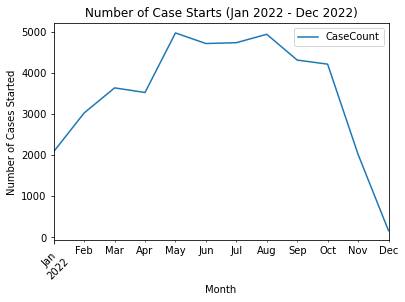

In [44]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Start_Time'])
case_start = df.groupby('Case_ID')['Timestamp'].min().reset_index()
case_start['StartMonth'] = case_start['Timestamp'].dt.to_period('M')
case_start_count = case_start.groupby('StartMonth').size().reset_index(name='CaseCount')

start_period = pd.Period('2022-01', freq='M')
end_period = pd.Period('2022-12', freq='M')
case_start_count_filtered = case_start_count[
    (case_start_count['StartMonth'] >= start_period) & (case_start_count['StartMonth'] <= end_period)
]

case_start_count_filtered.plot(x='StartMonth', y='CaseCount', kind='line', title='Number of Case Starts (Jan 2022 - Dec 2022)')

# Display the plot
plt.ylabel('Number of Cases Started')
plt.xlabel('Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### Check cases performed in just 1 site where PO Changed happens more than once.
Does not exist. No over-processing found.

In [ ]:
df_single_site = df[df['Site_Count'] == 1]
df_po_changed = df_single_site[df_single_site['Activity'] == 'PO Changed']
po_changed_counts = df_po_changed.groupby('Case_ID').size().reset_index(name='PO_Changed_Count')
po_changed_counts.sort_values(by='PO_Changed_Count', ascending=False)

### Export to parquet

In [83]:
save_file_path = 'CoompleteP2P-Part1-Preprocessed.parquet'
df.to_parquet(save_file_path, index=False)

## Preprocess CompleteP2P-Part2 Parquet File

In [84]:
file_path = 'CompleteP2P-Part2.parquet'
df = pd.read_parquet(file_path)

print(df.shape)
df.head(20)

(586086, 17)


,Case_ID,variant,variant_index,creator,InvoiceNumber,Activity,Resource,Activity_1,PONumber,Vendor_Code,Site,TotalGST,TotalAmount,User,VendorCode,End_Time,Start_Time
0,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Goods Arrived,Staff,Goods Arrived,611603.0,CORP001,Site - QR,27.39,301.32,Staff,None,2023-02-05T14:00:00.000,2023-02-05T14:00:00.000
1,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,PO Changed,Staff,PO Changed,611603.0,CORP001,Site - QR,27.39,301.32,Staff,None,2023-02-06T04:21:00.000,2023-02-06T04:21:00.000
2,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Goods Receipted,Staff,Goods Receipted,611603.0,CORP001,Site - QR,27.39,301.32,Staff,None,2023-02-09T14:00:00.000,2023-02-09T14:00:00.000
3,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,InvoiceDate,Staff,InvoiceDate,611603.0,CORP001,Site - QR,27.39,301.32,Staff,None,2023-02-12T14:00:00.000,2023-02-12T14:00:00.000
4,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - InvoiceDate,Not Activity,Bot - InvoiceDate,611603.0,None,Site - QR,27.40,301.32,Not Activity,CORP001,2023-02-12T14:00:00.000,2023-02-12T14:00:00.000
5,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - InvoiceReceived,Automation - R2D2,Bot - InvoiceReceived,611603.0,None,Site - QR,27.40,301.32,Automation - R2D2,CORP001,2023-02-14T16:19:00.000,2023-02-14T16:19:00.000
6,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - InvoiceParked,Automation - R2D2,Bot - InvoiceParked,611603.0,None,Site - QR,27.40,301.32,Automation - R2D2,CORP001,2023-02-19T11:32:00.000,2023-02-19T11:32:00.000
7,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - SentToActionCentre,Automation - R2D2,Bot - SentToActionCentre,611603.0,None,Site - QR,27.40,301.32,Automation - R2D2,CORP001,2023-02-23T17:29:00.000,2023-02-23T17:29:00.000
8,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - BusinessExceptionTaskCreated,Automation - R2D2,Bot - BusinessExceptionTaskCreated,611603.0,None,Site - QR,27.40,301.32,Automation - R2D2,CORP001,2023-02-23T17:30:00.000,2023-02-23T17:30:00.000
9,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - BusinessExceptionActioned,Staff,Bot - BusinessExceptionActioned,611603.0,None,Site - QR,27.40,301.32,Staff,CORP001,2023-02-23T23:38:00.000,2023-02-23T23:38:00.000


### 1. Combine VendorCode and Vendor_Code Columns

In [85]:
df['VendorCode_Processed'] = df['Vendor_Code'].fillna(df['VendorCode']) 
df = df.drop('VendorCode', axis=1)
df = df.drop('Vendor_Code', axis=1)

In [65]:
df.shape
df.head(20)
df['VendorCode_Processed'].nunique()

118

In [66]:
# Check Case IDs with more than one sites
caseid_site_counts = df.groupby('Case_ID')['Site'].nunique()
print(caseid_site_counts[caseid_site_counts > 1])

Case_ID
ACCO001 - 212890      2
ACCO001 - 213284      2
ACCO001 - 213913      2
ACCO001 - 214198      2
ACCO001 - 214535      2
                     ..
V001523 - S123725     2
V001523 - S123748     2
V001523 - S126167     2
WISD001 - IV000394    2
WISD001 - IV000395    2
Name: Site, Length: 779, dtype: int64


### 2. Add 'Stage' Attribute Column

In [86]:
def categorize_activity_post(activity):
    if activity in ['PO Order Created', 'InvoiceDate', 'Bot - InvoiceDate']:
        return 'Order'
    elif activity in ['Goods Arrived', 'Goods Receipted', 'PO Changed']:
        return 'Delivery'
    elif activity in ['InvoiceProcessed', 'Invoice Changed', 'InvoiceDueDate', 'Invoice Changed-Posted', 'Bot - Actions-Error',
'Bot - BusinessExceptionActioned', 'Bot - BusinessExceptionActionedAsForceSelectAll', 'Bot - BusinessExceptionTaskCreated', 'Bot - DU-Error',
'Bot - EmailManager-Error', 'Bot - InvoiceAlreadyParked', 'Bot - InvoiceAlreadyProcessed', 'Bot - InvoiceDigitised', 'Bot - InvoiceEntry-Error',
'Bot - InvoiceParked', 'Bot - InvoiceProcessed', 'Bot - InvoiceReceived', 'Bot - ParkingError', 'Bot - ReturnToAP', 'Bot - SentToActionCentre',
'Bot - SentToAP', 'Bot - SentToDCS', 'Bot - SentToDVS', 'Bot - SentToHomes', 'Bot - XML-Error', 'Bot - InvoiceDueDate']:
        return 'Payment'
    else:
        return 'Other'

df['Stage'] = df['Activity'].apply(categorize_activity_post)

In [68]:
df.head(20)

,Case_ID,variant,variant_index,creator,InvoiceNumber,Activity,Resource,Activity_1,PONumber,Site,TotalGST,TotalAmount,User,End_Time,Start_Time,VendorCode_Processed,Stage
0,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Goods Arrived,Staff,Goods Arrived,611603.0,Site - QR,27.39,301.32,Staff,2023-02-05T14:00:00.000,2023-02-05T14:00:00.000,CORP001,Delivery
1,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,PO Changed,Staff,PO Changed,611603.0,Site - QR,27.39,301.32,Staff,2023-02-06T04:21:00.000,2023-02-06T04:21:00.000,CORP001,Delivery
2,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Goods Receipted,Staff,Goods Receipted,611603.0,Site - QR,27.39,301.32,Staff,2023-02-09T14:00:00.000,2023-02-09T14:00:00.000,CORP001,Delivery
3,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,InvoiceDate,Staff,InvoiceDate,611603.0,Site - QR,27.39,301.32,Staff,2023-02-12T14:00:00.000,2023-02-12T14:00:00.000,CORP001,Order
4,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - InvoiceDate,Not Activity,Bot - InvoiceDate,611603.0,Site - QR,27.40,301.32,Not Activity,2023-02-12T14:00:00.000,2023-02-12T14:00:00.000,CORP001,Order
5,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - InvoiceReceived,Automation - R2D2,Bot - InvoiceReceived,611603.0,Site - QR,27.40,301.32,Automation - R2D2,2023-02-14T16:19:00.000,2023-02-14T16:19:00.000,CORP001,Payment
6,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - InvoiceParked,Automation - R2D2,Bot - InvoiceParked,611603.0,Site - QR,27.40,301.32,Automation - R2D2,2023-02-19T11:32:00.000,2023-02-19T11:32:00.000,CORP001,Payment
7,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - SentToActionCentre,Automation - R2D2,Bot - SentToActionCentre,611603.0,Site - QR,27.40,301.32,Automation - R2D2,2023-02-23T17:29:00.000,2023-02-23T17:29:00.000,CORP001,Payment
8,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - BusinessExceptionTaskCreated,Automation - R2D2,Bot - BusinessExceptionTaskCreated,611603.0,Site - QR,27.40,301.32,Automation - R2D2,2023-02-23T17:30:00.000,2023-02-23T17:30:00.000,CORP001,Payment
9,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - BusinessExceptionActioned,Staff,Bot - BusinessExceptionActioned,611603.0,Site - QR,27.40,301.32,Staff,2023-02-23T23:38:00.000,2023-02-23T23:38:00.000,CORP001,Payment


### 3. Add 'Site_Count' Attribute Column

In [87]:
site_counts = df.groupby('Case_ID')['Site'].nunique().reset_index(name='Site_Count')
df = pd.merge(df, site_counts, on='Case_ID', how='left')
df.head(10)

,Case_ID,variant,variant_index,creator,InvoiceNumber,Activity,Resource,Activity_1,PONumber,Site,TotalGST,TotalAmount,User,End_Time,Start_Time,VendorCode_Processed,Stage,Site_Count
0,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Goods Arrived,Staff,Goods Arrived,611603.0,Site - QR,27.39,301.32,Staff,2023-02-05T14:00:00.000,2023-02-05T14:00:00.000,CORP001,Delivery,1
1,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,PO Changed,Staff,PO Changed,611603.0,Site - QR,27.39,301.32,Staff,2023-02-06T04:21:00.000,2023-02-06T04:21:00.000,CORP001,Delivery,1
2,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Goods Receipted,Staff,Goods Receipted,611603.0,Site - QR,27.39,301.32,Staff,2023-02-09T14:00:00.000,2023-02-09T14:00:00.000,CORP001,Delivery,1
3,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,InvoiceDate,Staff,InvoiceDate,611603.0,Site - QR,27.39,301.32,Staff,2023-02-12T14:00:00.000,2023-02-12T14:00:00.000,CORP001,Order,1
4,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - InvoiceDate,Not Activity,Bot - InvoiceDate,611603.0,Site - QR,27.40,301.32,Not Activity,2023-02-12T14:00:00.000,2023-02-12T14:00:00.000,CORP001,Order,1
5,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - InvoiceReceived,Automation - R2D2,Bot - InvoiceReceived,611603.0,Site - QR,27.40,301.32,Automation - R2D2,2023-02-14T16:19:00.000,2023-02-14T16:19:00.000,CORP001,Payment,1
6,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - InvoiceParked,Automation - R2D2,Bot - InvoiceParked,611603.0,Site - QR,27.40,301.32,Automation - R2D2,2023-02-19T11:32:00.000,2023-02-19T11:32:00.000,CORP001,Payment,1
7,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - SentToActionCentre,Automation - R2D2,Bot - SentToActionCentre,611603.0,Site - QR,27.40,301.32,Automation - R2D2,2023-02-23T17:29:00.000,2023-02-23T17:29:00.000,CORP001,Payment,1
8,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - BusinessExceptionTaskCreated,Automation - R2D2,Bot - BusinessExceptionTaskCreated,611603.0,Site - QR,27.40,301.32,Automation - R2D2,2023-02-23T17:30:00.000,2023-02-23T17:30:00.000,CORP001,Payment,1
9,CORP001 - 9901397271,Variant 4635,4635,Fluxicon Disco,9901397271,Bot - BusinessExceptionActioned,Staff,Bot - BusinessExceptionActioned,611603.0,Site - QR,27.40,301.32,Staff,2023-02-23T23:38:00.000,2023-02-23T23:38:00.000,CORP001,Payment,1


### Export to Parquet

In [88]:
save_file_path = 'CoompleteP2P-Part2-Preprocessed.parquet'
df.to_parquet(save_file_path, index=False)

## Preprocess EventLog2024 Parquet File

In [89]:
file_path = 'EventLog2024.parquet'
df = pd.read_parquet(file_path)

print(df.shape)
df.head()

(389572, 16)


,Case_ID,variant,variant_index,creator,InvoiceNumber,VendorCode,Activity,Resource,Activity_1,Resource_1,PONumber,TotalGST,TotalAmount,Site,End_Time,Start_Time
0,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,Bot - SentToAP,Automation - R2D2,Bot - SentToAP,Automation - R2D2,686023,28.7,315.67,Site - DE,2024-05-18T04:43:34.000,2024-05-18T04:43:34.000
1,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,Bot - InvoiceDueDate,Not Activity,Bot - InvoiceDueDate,Not Activity,686023,28.7,315.67,Site - DE,2024-05-29T16:00:00.000,2024-05-29T16:00:00.000
2,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,InvoiceDueDate,Not Activity,InvoiceDueDate,Not Activity,686023,28.7,315.67,Site - AB,2024-05-29T16:00:00.000,2024-05-29T16:00:00.000
3,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,InvoiceDueDate,Not Activity,InvoiceDueDate,Not Activity,686023,28.7,315.67,Site - DE,2024-05-29T16:00:00.000,2024-05-29T16:00:00.000
4,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,Goods Arrived,Staff,Goods Arrived,Staff,686023,28.7,315.67,Site - AB,2024-06-27T16:00:00.000,2024-06-27T16:00:00.000


### 1. Add 'Stage' Attribute Column

In [90]:
df['Stage'] = df['Activity'].apply(categorize_activity_post)

### 2. Add 'Site_Count' Attribute Column

In [91]:
site_counts = df.groupby('Case_ID')['Site'].nunique().reset_index(name='Site_Count')
df = pd.merge(df, site_counts, on='Case_ID', how='left')
df.head(10)

,Case_ID,variant,variant_index,creator,InvoiceNumber,VendorCode,Activity,Resource,Activity_1,Resource_1,PONumber,TotalGST,TotalAmount,Site,End_Time,Start_Time,Stage,Site_Count
0,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,Bot - SentToAP,Automation - R2D2,Bot - SentToAP,Automation - R2D2,686023,28.7,315.67,Site - DE,2024-05-18T04:43:34.000,2024-05-18T04:43:34.000,Payment,2
1,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,Bot - InvoiceDueDate,Not Activity,Bot - InvoiceDueDate,Not Activity,686023,28.7,315.67,Site - DE,2024-05-29T16:00:00.000,2024-05-29T16:00:00.000,Payment,2
2,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,InvoiceDueDate,Not Activity,InvoiceDueDate,Not Activity,686023,28.7,315.67,Site - AB,2024-05-29T16:00:00.000,2024-05-29T16:00:00.000,Payment,2
3,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,InvoiceDueDate,Not Activity,InvoiceDueDate,Not Activity,686023,28.7,315.67,Site - DE,2024-05-29T16:00:00.000,2024-05-29T16:00:00.000,Payment,2
4,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,Goods Arrived,Staff,Goods Arrived,Staff,686023,28.7,315.67,Site - AB,2024-06-27T16:00:00.000,2024-06-27T16:00:00.000,Delivery,2
5,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,Goods Receipted,Staff,Goods Receipted,Staff,686023,28.7,315.67,Site - AB,2024-06-27T16:00:00.000,2024-06-27T16:00:00.000,Delivery,2
6,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,InvoiceProcessed,Staff,InvoiceProcessed,Staff,686023,28.7,315.67,Site - AB,2024-07-01T16:00:00.000,2024-07-01T16:00:00.000,Payment,2
7,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,InvoiceProcessed,Staff,InvoiceProcessed,Staff,686023,28.7,315.67,Site - DE,2024-07-01T16:00:00.000,2024-07-01T16:00:00.000,Payment,2
8,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,Invoice Changed,Staff,Invoice Changed,Staff,686023,28.7,315.67,Site - AB,2024-07-02T04:34:02.000,2024-07-02T04:34:02.000,Payment,2
9,BUNZ003 - Y069394,Variant 2347,2347,Fluxicon Disco,Y069394,BUNZ003,Invoice Changed,Staff,Invoice Changed,Staff,686023,28.7,315.67,Site - DE,2024-07-02T04:34:02.000,2024-07-02T04:34:02.000,Payment,2


### Export to Parquet

In [92]:
save_file_path = 'EventLog2024-Preprocessed.parquet'
df.to_parquet(save_file_path, index=False)